<a href="https://colab.research.google.com/github/Ruqyai/Colab/blob/master/Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Learning Objectives:**
  * Learn fundamental TensorFlow concepts
  * Load the data.
  * Define the architecture of the model and what is a neural network.
  * Train the model.
  *  Making some predictions for evaluating the trained model.
  * Learn about useful tool Tensorboard.
  
  

## Classification Example

> [visual examplet](http://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=gauss&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.20090&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)







1.   ** Import requirements**


In [0]:
#load the necessary libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
tf.logging.set_verbosity(tf.logging.WARN)# just for undisplay the WARNING



2.  ** Input Data**





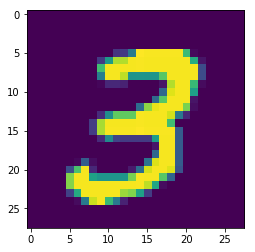

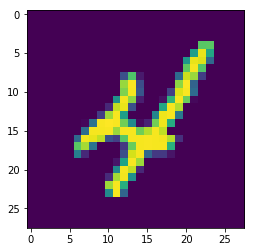

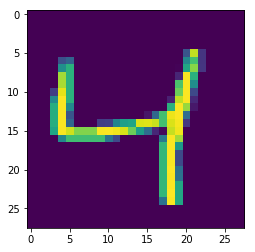

In [19]:
# load the dataset 
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
#we can use the pyplot library to draw the image so we know what the dataset looks like
fig = plt.figure(figsize=(4,4))
plt.imshow(x_train[7])
fig = plt.figure(figsize=(4,4))
plt.imshow(x_train[9])
fig = plt.figure(figsize=(4,4))
plt.imshow(x_train[2])

In [0]:
# Normalizing (rescale ) the images to the range of [0., 1.]
x_train, x_test = x_train / 255.0, x_test / 255.0

3.  ** Bulid Model**




In [21]:
model = tf.keras.models.Sequential([
  # input: images of size 28x28 pixels 
  tf.keras.layers.Flatten(input_shape=x_train[0].shape),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  # output: classifying into 10 categories
  tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()# list the summary of the Layers (type), Output, Shape and Params 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


4. **Compile the model**

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

5.  ** Train the Model**

In [23]:
model.fit(x_train, y_train, epochs=5) # we use (model.fit) for training the model


Epoch 1/5
60000/60000 [==============================] - 6s 95us/sample - loss: 0.2929 - acc: 0.9146
Epoch 2/5
60000/60000 [==============================] - 6s 92us/sample - loss: 0.1402 - acc: 0.9588
Epoch 3/5
60000/60000 [==============================] - 6s 93us/sample - loss: 0.1058 - acc: 0.9673
Epoch 4/5
60000/60000 [==============================] - 5s 92us/sample - loss: 0.0882 - acc: 0.9738
Epoch 5/5
60000/60000 [==============================] - 6s 92us/sample - loss: 0.0750 - acc: 0.9771


6.  ** Evaluatet accuracy**

In [24]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test)
print('\n', 'Test loss:', score[0])
print('\n', 'Test accuracy:', score[1])

10000/10000 [==============================] - 1s 52us/sample - loss: 0.0752 - acc: 0.9782

 Test loss: 0.07522266890644096

 Test accuracy: 0.9782


7. **Predict**

Remember that neural networks deal with probabilities


 The predicted number is : 4


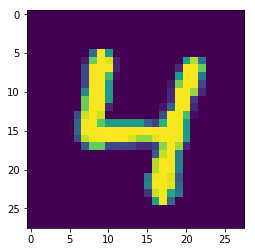

In [27]:
# let us visualize random image from the x_test dataset
random= 56 # put any random index. Note it should be in the range
predict = model.predict(x_test) # get predictions on the test set by using (model.predict)
value_of_predict = np.argmax(predict[random])# argmax returns the indices of the maximum values along an axis
print('\n', 'The predicted number is :',value_of_predict)
plt.imshow(x_test[random])#show if the prediction matches the real image


##Tensorboard
TensorBoard is a suite of visualization tools to make it easier to understand, debug, and optimize TensorFlow programs

In [26]:
!pip install tensorboardcolab
from tensorboardcolab import * 
tbc = TensorBoardColab()
writer = tbc.get_writer()
writer.add_graph(tf.get_default_graph())
writer.flush()

Wait for 8 seconds...
TensorBoard link:
https://bb07f3f7.ngrok.io


Now in TF version 2.0 , TensorBoard can be used directly within notebook experiences such as Colab and Jupyter. This can be helpful for sharing results, integrating TensorBoard into existing workflows, and using TensorBoard without installing anything locally. [try it ](https://colab.research.google.com/github/tensorflow/tensorboard/blob/master/docs/r2/tensorboard_in_notebooks.ipynb)